# kNN k-Nearest Neighbors (Метод k-ближайших соседей)

Применение алгоритма kNN для решения задачи классификации.


### Датасет
Рассматривать задачу будем на примере известного датасета **Цветки Ириса**

Датасет [Цветки Ириса](https://archive.ics.uci.edu/ml/datasets/iris) содержит 150 записей, каждая из записей содержит 4 признака, т.е. $\boldsymbol x \in \mathbb{R}^4$.

Что за 4 признака?

0. длина чашелистника, см
1. ширина чашелистника, см
2. длина лепестка, см
3. ширина лепестка, см

Метки классов

0. Setosa
1. Versicolour
2. Virginica

## 0. Импорт библиотек

In [1]:
# программная реализация алгоритма kNN для классификации
from sklearn.neighbors import KNeighborsClassifier
# программная реализация расчета метрики точности
from sklearn.metrics import accuracy_score
# модуль для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

# модуль, позволяющий подтягивать данные по хрестоматийным примерам для ML
from sklearn import datasets

# модули визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

# библиотеки для работы с матрицами
import pandas as pd
import numpy as np

## 1. Загружаем данные по цветкам ирисов

Для этого воспользуемся встроенным в библиотеке `scikit-learn` модулем `datasets`

In [2]:
iris = datasets.load_iris()

> Что за тип данных `iris`?

In [5]:
# Выведите названия признаков
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Выведите данные по признакам
pds = pd.DataFrame(data=iris.data, columns=iris.feature_names)
for i, name in enumerate(iris.feature_names):
    print(f"{'='*40}")
    print(f"Признак {i + 1}: {name}")
    print(f"{'-'*40}")
    print("Первые 5 значений:")
    print(pds[name].head().to_string(index=False))
    print("...")
    print("Последние 5 значений:")
    print(pds[name].tail().to_string(index=False))
    print(f"{'='*40}\n")


Признак 1: sepal length (cm)
----------------------------------------
Первые 5 значений:
5.1
4.9
4.7
4.6
5.0
...
Последние 5 значений:
6.7
6.3
6.5
6.2
5.9

Признак 2: sepal width (cm)
----------------------------------------
Первые 5 значений:
3.5
3.0
3.2
3.1
3.6
...
Последние 5 значений:
3.0
2.5
3.0
3.4
3.0

Признак 3: petal length (cm)
----------------------------------------
Первые 5 значений:
1.4
1.4
1.3
1.5
1.4
...
Последние 5 значений:
5.2
5.0
5.2
5.4
5.1

Признак 4: petal width (cm)
----------------------------------------
Первые 5 значений:
0.2
0.2
0.2
0.2
0.2
...
Последние 5 значений:
2.3
1.9
2.0
2.3
1.8



In [8]:
# Выведите информацию по целевой переменной (классам цветка)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
# Выведите информацию по размерности датасета и целевой переменной
# чтобы убедиться, что размерности совпадают
print(f"Признаковое пространство: {iris.data.shape[0]}, Целевая переменная: {iris.target.shape[0]}")

Признаковое пространство: 150, Целевая переменная: 150


In [10]:
# Вынесем признаки и целевую перемнную в отдельные переменные
a = iris.data
b = iris.target

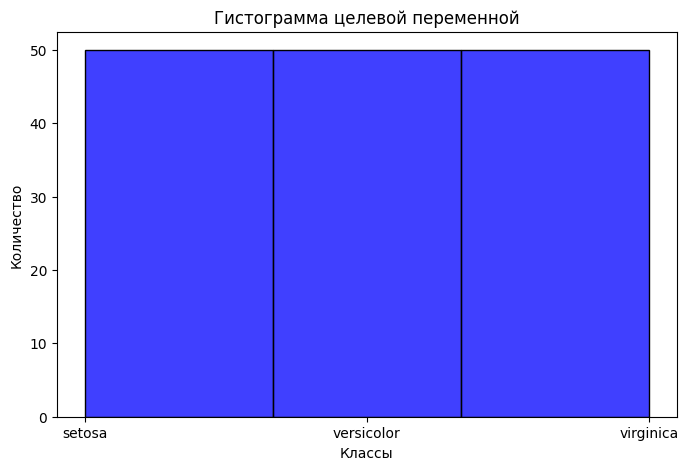

In [18]:
# Посмотрим на гистограмму распределения целевой переменной
# Убедитесь в сбалансированности классов
# Построение гистограммы целевой переменной
plt.figure(figsize=(8, 5))
sns.histplot(b, bins=3, kde=False, color='blue')
plt.title('Гистограмма целевой переменной')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.xticks([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
plt.show()


Данные очень хорошо сбалансированы - каждого класса по 50 объектов.

> Выведите гистограммы для всех признаков X

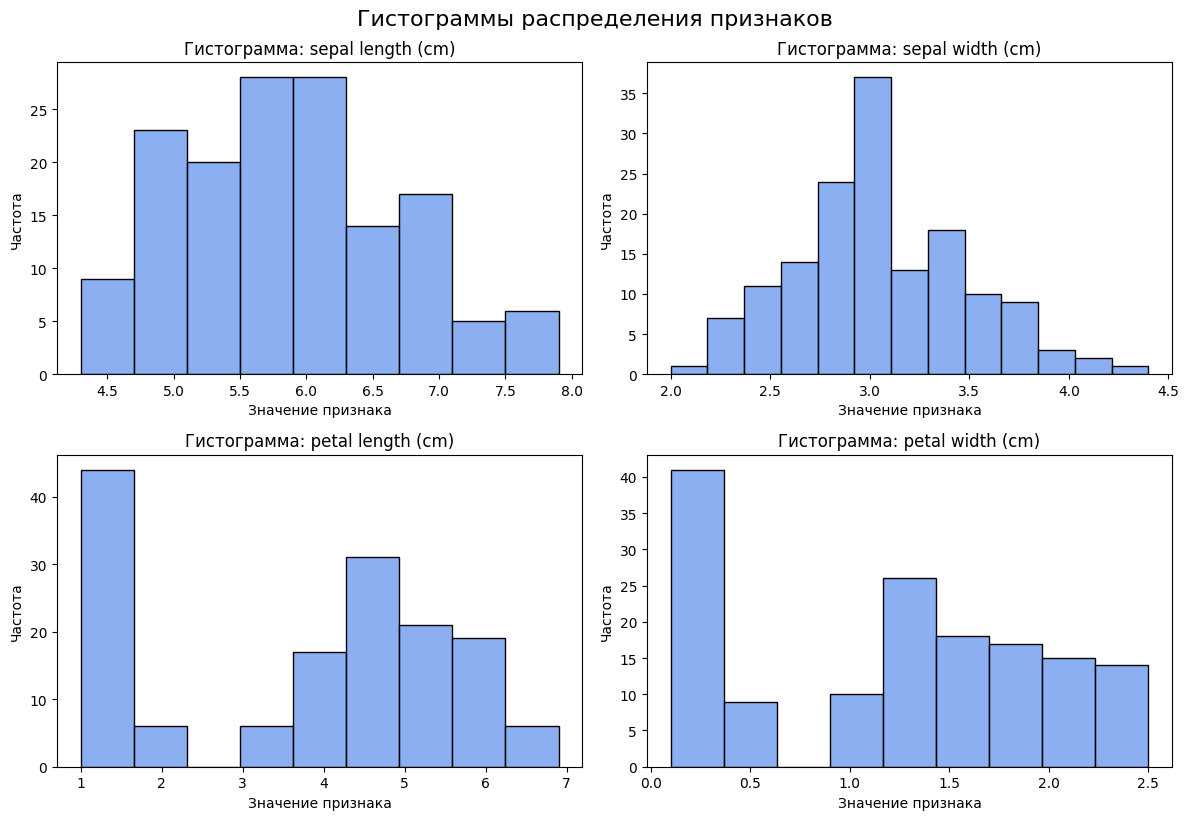

In [23]:
# type your code here
# Построение гистограмм с поясняющим заголовком
plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    sns.histplot(a[:, i], kde=False, color='cornflowerblue', edgecolor='black')
    plt.title(f"Гистограмма: {iris.feature_names[i]}")
    plt.xlabel("Значение признака")
    plt.ylabel("Частота")

plt.tight_layout()
plt.suptitle("Гистограммы распределения признаков", fontsize=16, y=1.02)  # Общий заголовок
plt.show()


In [24]:
# Пример результата

## 2. Визуально изобразим данные

Для отображения в двумерном пространстве выберем параметры `длина чашелистика, см` и `длина лепестка, см`

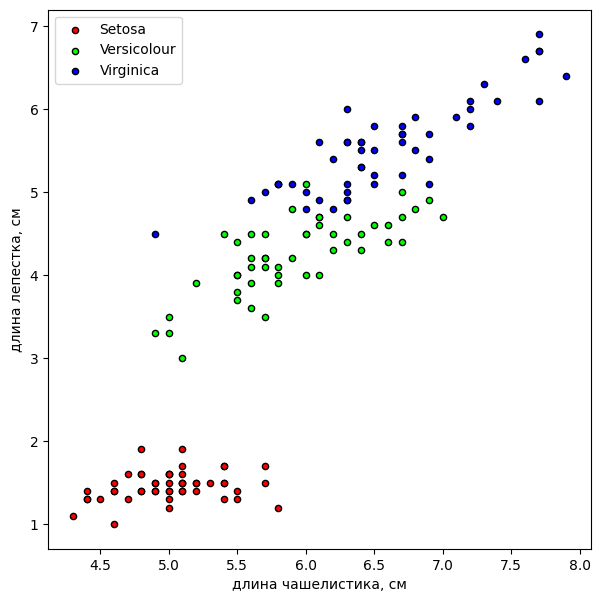

In [28]:
# список цветов для визуализации
cmap_bold = ListedColormap(['#FF0000',  '#00FF00', '#0000FF'])

# создадим полотно
fig, ax = plt.subplots(figsize=(7,7))
# отрисуем экземпляры
for i, iris_class in enumerate(['Setosa', 'Versicolour', 'Virginica']):
    idx = b==i
    ax.scatter(a[idx,0], a[idx,2],
               c=cmap_bold.colors[i], edgecolor='k',
               s=20, label=iris_class);

ax.set(xlabel='длина чашелистика, см', ylabel='длина лепестка, см')
ax.legend();

> Создайте переменную `iris_df`, которая будет представлять собой DataFrame из всех X и целевой переменной

In [34]:
iris_df = pd.DataFrame(a, columns=iris.feature_names)
iris_df['flower'] = iris.target_names[iris.target]
iris_df['target'] = iris.target

# Вывод первых строк
iris_df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


> При помощи `sns.pairplot` выведите диаграммы рассеивания для всех попарных комбинаций признаков

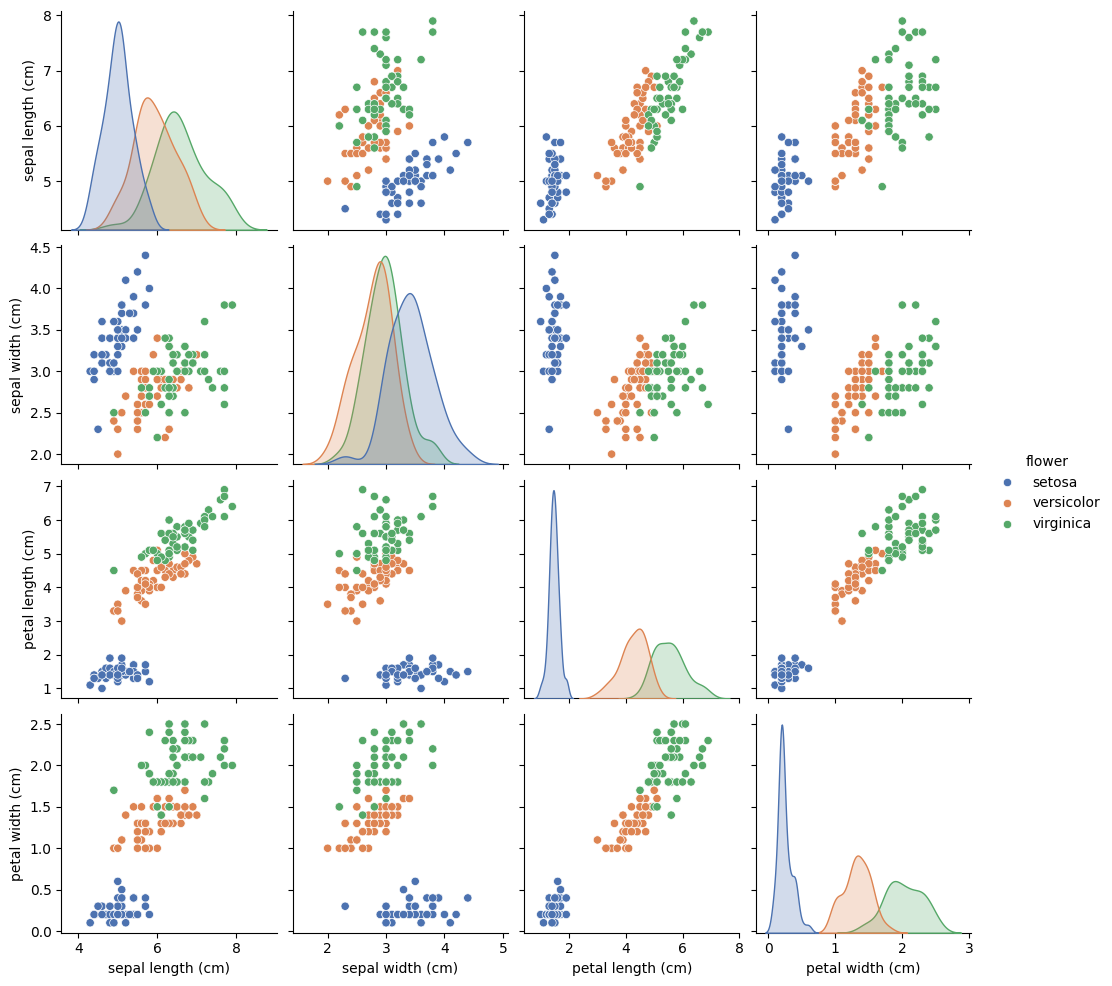

In [40]:
# type your code here
sns.pairplot(iris_df.drop(columns=['target']), hue="flower", palette='deep')
plt.show()


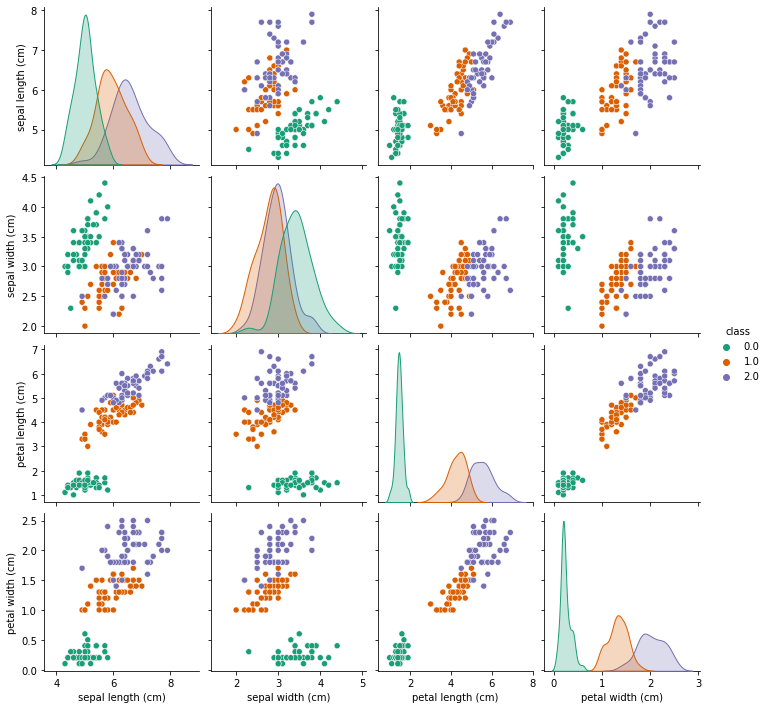

In [ ]:
# что должно получиться на выходе

### Посмотрим на `plotly.express`

In [42]:
px.histogram(data_frame=iris_df,x='sepal length (cm)',color='flower')

In [43]:
df = px.data.iris()
fig = px.scatter(df, x=df.sepal_length, y=df.sepal_width, color=df.species, size=df.petal_length)
fig.show()

# 3. Обучение модели

Теперь давайте попробуем обучить модель, которая будет на основании параметров цветка, определять к какому сорту относится этот цветок.

## 3.1. Обучение на всех данных

In [47]:
# Создадим объект класса KNN с параметром n_neighbors=3
classifier_kNN = KNeighborsClassifier(n_neighbors=3)
A = a
B = b
# Обучение модели
classifier_kNN.fit(A, B)

# Прогноз
B_pred = classifier_kNN.predict(A)

In [48]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(B, B_pred)*100
print('Точность модели равна на всей выборке ' + str(round(accuracy, 2)) + ' %.')

Точность модели равна на всей выборке 96.0 %.


## 3.2. Разбиение выборки на train и test

Если мы будем оценивать качество модели на тех же данных, на которых обучали модель, как в примере выше, то будет происходить процесс заучивания ответов, а не поиска закономерностей в данных. В таком случае, модель не будет обладать обобщающей способностью и когда на вход прилетят новые данные, точность подобного прогноза будет сильно ниже, чем на данных, на которых модель обучалась.

В машинном обучении принято разделять данные на обучающую (**training set**) и тестовую (**test set**) выборки с тем, чтобы повысить обобщающую способность модели, т.е. способность делать прогнозы на данных, которые не участвовали при обучении.

Некоторым стандартом принято использовать разбиение 80 на 20, где 80% - размер обучающей выборки, 20% - размер тестовой выборки. Это не прибитые гвоздем значения, в зависимости от задачи они конечно могут меняться, но если нет никаких вводных по размерам этих групп, в первом приближении можно брать такое разбиение.

При разбиении важно учесть, чтобы и в тестовой и в обучающей выборках данные были распределены корректно. Стратификацию можно реализовать самостоятельно, но более оптимальным решением является использование готовой библиотеки `sklearn` и конкретно модулем `train_test_split`.

In [49]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=21)

> # Задание 1
>
> При помощи функции `mean()` посчитайте среднее значение для параметра **sepal length (cm)** (первый столбец в X) и введите в  поле ответа модуль разности между значениями для X_train и X_test (округлите до второго знака).

In [50]:
# type your code here
# Вычисление средних значений
mean_train = np.mean(A_train[:, 0])
mean_test = np.mean(A_test[:, 0])

# Вычисление модуля разности
diff = abs(mean_train - mean_test)

# Вывод результатов
print(f"Среднее для обучающей выборки: {mean_train:.2f}")
print(f"Среднее для тестовой выборки: {mean_test:.2f}")
print(f"Модуль разности: {diff:.2f}")


Среднее для обучающей выборки: 5.87
Среднее для тестовой выборки: 5.75
Модуль разности: 0.12


А теперь приступим к обучению модели на новом разбиении данных

In [51]:
# Создадим объект класса KNN с параметром n_neighbors=5
classifier_kNN_robust = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающей выборке
classifier_kNN_robust.fit(A_train, B_train)

# Прогноз на тестовых данных
B_pred = classifier_kNN_robust.predict(A_test)

In [52]:
# Посчитаем точность модели как долю верно классифицированных объектов
accuracy = accuracy_score(B_test, B_pred)*100
print('Точность модели на тестовой выборке равна ' + str(round(accuracy, 2)) + ' %.')

Точность модели на тестовой выборке равна 96.67 %.


> # Задание 2
>
> Найдите оптимальное количество соседей для алгоритма в диапазоне [2;40]. Если для каких-то значений параметра `n_neighbours` будет одинаковая метрика accuracy, предпочтительнее брать модель с меньшим параметром. Ответ занесите в форму.

In [60]:
n_neighbours = range(2,41)
acc_list = [
    accuracy_score(B_test, KNeighborsClassifier(n_neighbors=n_n).fit(A_train, B_train).predict(A_test))
    for n_n in range(2, 41)
]


In [62]:
best_k = n_neighbours[acc_list.index(max(acc_list))]
print(f"Optimal n_neighbors: {best_k}")


Optimal n_neighbors: 3


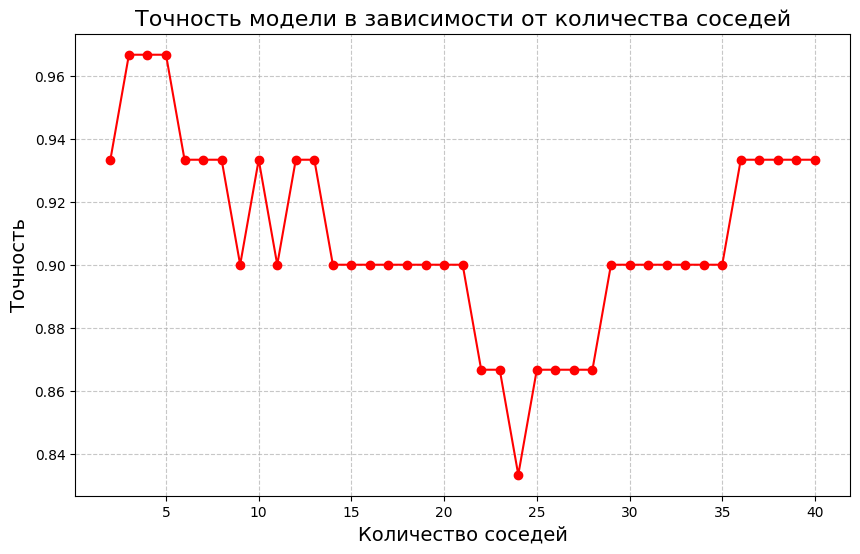

In [67]:
# plot acc_list
plt.figure(figsize=(10, 6))  # Размер графика
plt.plot(n_neighbours, acc_list, marker='o', color='red', linestyle='-', markersize=6)

plt.title('Точность модели в зависимости от количества соседей', fontsize=16)
plt.xlabel('Количество соседей', fontsize=14)
plt.ylabel('Точность', fontsize=14)

# Включение сетки
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

